In [8]:
import coniii
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

Guide to use coniii solvers: https://github.com/eltrompetero/coniii/blob/py3/ipynb/usage_guide.ipynb

In [2]:
def spinize(traces):
    stds = np.std(traces,axis=-1)
    out = np.zeros_like(traces)
    for i in range(traces.shape[0]):
        for j in range(traces.shape[1]):
            if traces[i,j]>stds[i]:
                out[i][j] = 1
            else:
                out[i][j] = -1

    return out

    

In [3]:
# import raw trace and transofrm in spins
data = np.load('../../../data/raw_data/nike_calcium_trace.npy')
sample = spinize(data).T
#np.save('../data/processed_data/spins.npy',sample)


In [5]:
# fit model on subset of data
n_neurons = sample.shape[1]
n_timepoints = sample.shape[0]
sub_sample = sample[:n_timepoints,:n_neurons]
solver = coniii.Pseudo(sub_sample)
solver.solve();

/Users/davide/opt/anaconda3/envs/network_inference/lib/python3.8/site-packages/coniii/solvers.py:125: UserWarning: Assuming that calc_observables should be for Ising model.
  if iprint: warn("Assuming that calc_observables should be for Ising model.")
/Users/davide/opt/anaconda3/envs/network_inference/lib/python3.8/site-packages/coniii/solvers.py:134: UserWarning: Some pairwise correlations have magnitude close to one. Potential for poor solutions from diverging parameters.
  warn(msg)


In [10]:
f = open('../../../data/processed_data/pseudo_ll_model','wb')
pickle.dump(solver,f)

In [11]:
# unpack fitted value
h,J = solver.multipliers[:n_neurons],solver.multipliers[n_neurons:]

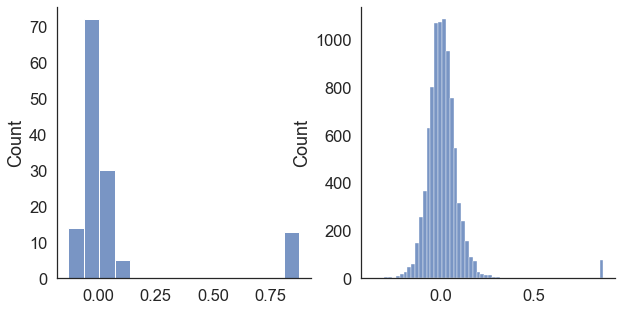

In [12]:
# histograms of values
outlier_th = 50
n_bins_h = 15
n_bins_J = 60
plt.figure(figsize=(10,5))
sns.set(font_scale=1.5,style='white')
plt.subplot(1,2,1)
sns.histplot(h[np.logical_and(h<outlier_th,h>-outlier_th)],bins=n_bins_h)
sns.despine()
plt.subplot(1,2,2)
sns.histplot(J[np.logical_and(J<outlier_th,J>-outlier_th)],bins=n_bins_J)

sns.despine()

In [17]:
def log_corr(x1,x2):
    f1 = sum(x1==1)/len(x1)
    f2 = sum(x2==1)/len(x2)
    f12 = sum((x1==1)*(x2==1))/len(x1)
    
    if f1==0 or f2==0:
        out = np.nan
    else:
        out = np.log(f12/(f1*f2))

    return out

In [18]:
CI = []
for i in range(n_neurons):
    print(i)
    for j in range(i+1,n_neurons-1):
        CI.append(log_corr(sub_sample[:,i],sub_sample[:,j]))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133


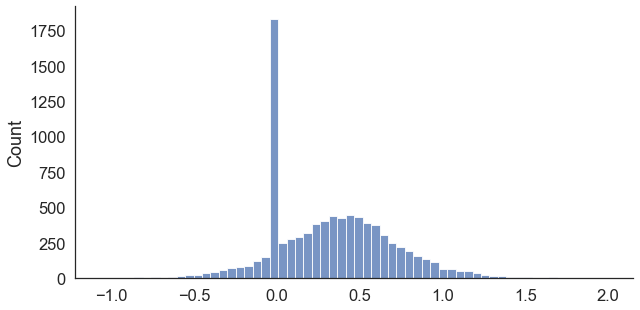

In [19]:
n_bins_CI = 60
plt.figure(figsize=(10,5))
sns.set(font_scale=1.5,style='white')
sns.histplot(CI,bins=n_bins_CI)
sns.despine()

ValueError: x and y must be the same size

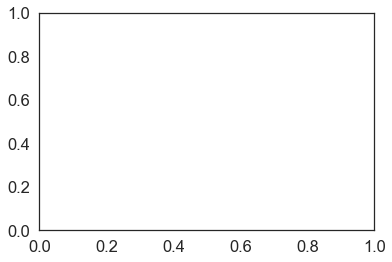

In [20]:
plt.scatter(CI,J)

In [21]:
len(CI)

8778

In [22]:
len(J)

8911